<IPython.core.display.Javascript object>


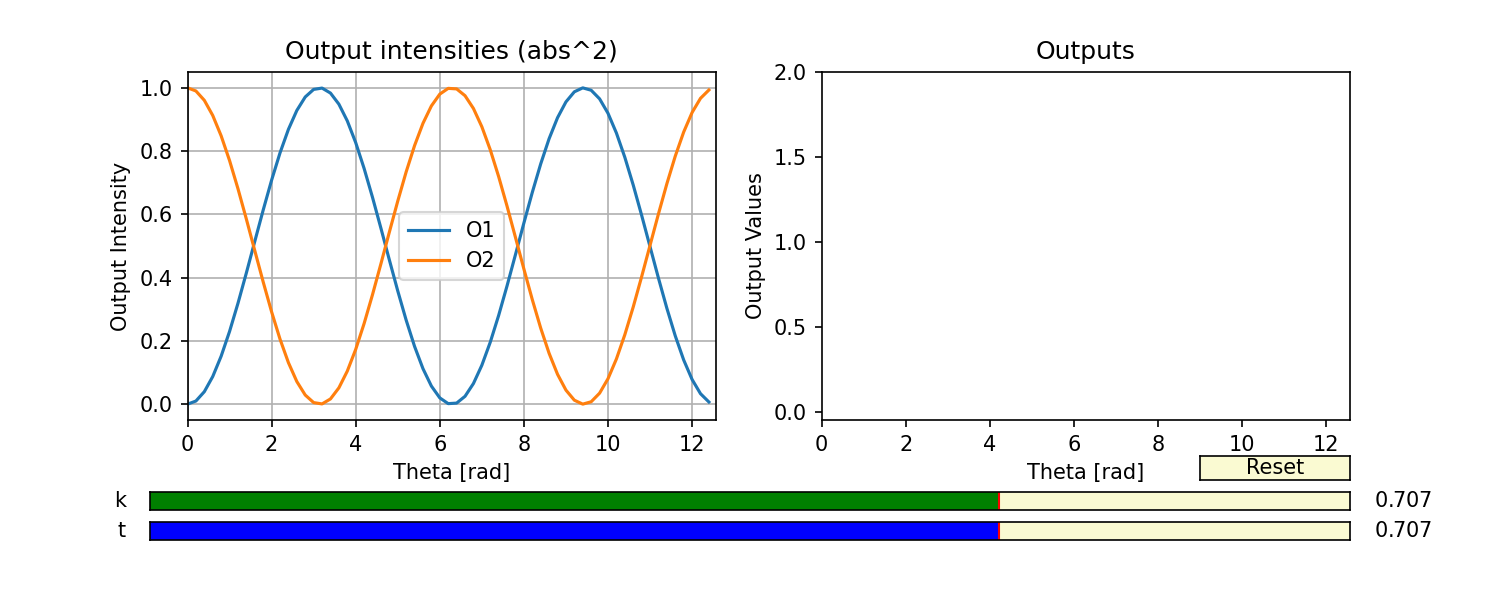

In [1]:
from numpy import pi, sin, cos, tan
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons, TextBox
from matplotlib.patches import Polygon
import math, cmath
%matplotlib notebook

i = 1j

# Compute the t parameter
def compute_t(k):
    return math.sqrt(1-abs(k)**2)

def compute_outputs(phi1,theta_array,t,k): #,outputs):

    global outputs
    outputs[0] = [cmath.exp(i*phi1)*(t**2-(k**2)*cmath.exp(i*theta_angle)) for theta_angle in theta_array]
    outputs[1] = [i*k*t*cmath.exp(i*phi1)*(1+cmath.exp(i*theta_angle)) for theta_angle in theta_array]
    return; #outputs

def compute_intensity(input_list): #,output_intensities):
    
    global outputs_intensities
    outputs_intensities[0] = [abs(inputs)**2 for inputs in input_list[0]]
    outputs_intensities[1] = [abs(inputs)**2 for inputs in input_list[1]]
    return; #output_intensities

k_0 = 0.0
initial_text = "1"



axis_color = 'lightgoldenrodyellow'

hf_general = plt.figure()
hf_general.set_size_inches(10, 4, forward=True)
ha_general = hf_general.add_subplot(121)   # R,T (reflected)
ha_general2 = hf_general.add_subplot(122)  # incident Vs refracted
#ha_incplane = hf_general.add_subplot(133)  # propagation plane
#ha_incplane.axis('off')                    # just image, no axes

# Adjust the subplots region to leave some space for the sliders and buttons
hf_general.subplots_adjust(bottom=0.30)
# Definition of x-variable
x = np.arange(0.0, pi/2, 0.001)

# Initialization of parameters
n1_0: float = 1.8
n2_0: float = 3.650
# Wasser initialization
# n1_0: float = 1.000
# n2_0: float = 1.333
# n1_0: float = 1.333
# n2_0: float = 1.000

Par1Name = 'k'
Par1_0 = n1_0
Par1Min = 0
Par1Max = 1

Par2Name = 't'
Par2_0 = n2_0
Par2Min = 0
Par2Max = 1

k_0 = 1/(math.sqrt(2))
t_0 = compute_t(k_0)
phi1_0 = pi/6
theta_array = np.arange(0,4*pi,0.2) # qui non deve essere troppo denso l'íntervallo
outputs = [[0 for x in range(len(theta_array))],[0 for x in range(len(theta_array))]]
outputs_intensities = [[0 for x in range(len(theta_array))],[0 for x in range(len(theta_array))]]
compute_outputs(phi1_0,theta_array,t_0,k_0) #,outputs)
compute_intensity(outputs) #,outputs_intensities)

# Draw the initial plot(s) and text(s)
# The 'line' variable is used for modifying the line later
[o1intensity_line] = ha_general.plot(theta_array, outputs_intensities[0], label='O1')  # output1 intensity
[o2intensity_line] = ha_general.plot(theta_array, outputs_intensities[1], label='O2')  # output2 intensity

#[o1_line] = ha_general2.plot(theta_array, outputs[0], label='O1')  # output1 value
#[o2_line] = ha_general2.plot(theta_array, outputs[0], label='O1')  # output2 value


# Define various settings for the first plot (reflection coeff Paralell/Ortogonal polarizations)
hf_general.set_label('Output for MZI')
ha_general.set_title('Output intensities (abs^2)')
ha_general.set_xlabel('Theta [rad]')
ha_general.set_ylabel('Output Intensity')
ha_general.set_xlim(0, 4*pi)
#ha_general.set_ylim(-0.05, 2)
ha_general.legend()
ha_general.grid()


ha_general2.set_label('Output for MZI')
ha_general2.set_title('Outputs')
ha_general2.set_xlabel('Theta [rad]')
ha_general2.set_ylabel('Output Values')
ha_general2.set_xlim(0, 4*pi)
ha_general2.set_ylim(-0.05, 2)
#ha_general2.legend()
#ha_general2.grid()

# Add two sliders for tweaking the parameters
# Define an axes area and draw a slider in it
par1_slider_ax = hf_general.add_axes([0.10, 0.15, 0.80, 0.03],
                                     facecolor=axis_color)
par1_slider = Slider(par1_slider_ax, Par1Name, Par1Min, Par1Max,
                     valinit=k_0, facecolor='green')

par2_slider_ax = hf_general.add_axes([0.10, 0.10, 0.80, 0.03],
                                     facecolor=axis_color)
par2_slider = Slider(par2_slider_ax, Par2Name, Par2Min, Par2Max,
                     valinit=t_0, facecolor='blue')

#axbox = plt.axes([0.1, 0.05, 0.8, 0.075])
#text_box = TextBox(axbox, 't is equal to: ', initial=initial_text)

# Define an action for modifying the line(s) when any slider's value changes
def slider1_on_changed(val):
    k = par1_slider.val
    t = compute_t(k)
    par2_slider.eventson = False
    par2_slider.set_val(t)
    par2_slider.eventson = True 
    #text_box.text(str(t))
    #print('prima' + outputs_intensities[0][0])
    compute_outputs(phi1_0,theta_array,t,k) #outputs = compute_outputs(phi1_0,theta_array,t,k,outputs)
    compute_intensity(outputs) #outputs_intensities = compute_intensity(outputs,outputs_intensities)
    #print('dopo' + outputs_intensities[0][0] + '\n')
    o1intensity_line.set_ydata(outputs_intensities[0])
    #o1intensity_line.set_xdata(theta_array)
    o2intensity_line.set_ydata(outputs_intensities[1])
    #o1intensity_line2.set_xdata(theta_array)
    #o1_line.set_ydata(outputs[0])
    #o2_line.set_ydata(outputs[1])  
    hf_general.canvas.draw_idle()
    #hf_general2.canvas.draw_idle()

    #plt.pause(0.001)
    #plt.show()

#def submit(text):
#    text_box.text(str(compute_t(par1_slider.val)))
    
par1_slider.on_changed(slider1_on_changed)
par2_slider.on_changed(slider1_on_changed)
#text_box.on_submit(submit)

# Add a button for resetting the parameters
reset_button_ax_g = hf_general.add_axes([0.8, 0.20, 0.1, 0.04])
reset_button_g = Button(reset_button_ax_g, 'Reset',
                        color=axis_color, hovercolor='0.975')


def reset_button_on_clicked_g(mouse_event):
    par1_slider.reset()


reset_button_g.on_clicked(reset_button_on_clicked_g)

# # Add a set of radio buttons for changing color
# color_radios_ax_g = hf_general.add_axes([0.025, 0.5, 0.15, 0.15], axisbg=axis_color)
# color_radios_g = RadioButtons(color_radios_ax_g, ('red', 'blue', 'green'), active=0)
# def color_radios_on_clicked_g(label):
#     h_pline.set_color(label)
#     hf_general.canvas.draw_idle()
# color_radios_g.on_clicked(color_radios_on_clicked_g)

plt.show()